In [1]:
ls /data/pragallva/2023_repeat_ERA5/post_processing/blocking_info_extra_variable/DJF_Ac=65/1980/1979-Dec-12.hkl

/data/pragallva/2023_repeat_ERA5/post_processing/blocking_info_extra_variable/DJF_Ac=65/1980/1979-Dec-12.hkl


In [30]:
import hickle as hkl 
import pyproj
from skimage import measure
import sys
import calendar
import os
from pathlib import Path
from functools import partial
from rtree import index
import shapely.ops as ops
import shapely.geometry as shp
# import shapely.speedups as speedup
# speedup.disable()
from scipy import stats
import matplotlib.pyplot as plt
import operator
import hickle as hkl
from scipy.stats import chisquare
from scipy.optimize import curve_fit
from scipy import optimize
import netCDF4 as nc
import glob
import numpy as np
import time as ti
import matplotlib.pylab as py
import numpy.ma as ma
import warnings
warnings.filterwarnings('ignore')

sys.path.append('/data/pragallva/2023_repeat_ERA5/modules/')
import logruns as logruns
import save_and_load_hdf5_files as h5saveload
import netcdf_utilities as ncutil
import os
os.environ["HDF5_USE_FILE_LOCKING"] = 'FALSE'
from tqdm import tqdm
import glob
from PIL import Image
import copy
import itertools
from datetime import date

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection

In [219]:
val_2007 = hkl.load('/data/pragallva/2023_repeat_ERA5/post_processing/blocking_info_extra_variable/DJF_Ac=65/2007.hkl')
list(val_2007.keys())

['start_block_date=2006-Dec-13',
 'start_block_date=2006-Dec-18',
 'start_block_date=2006-Dec-2',
 'start_block_date=2006-Dec-31',
 'start_block_date=2006-Nov-27',
 'start_block_date=2006-Nov-30',
 'start_block_date=2007-Feb-1',
 'start_block_date=2007-Feb-16',
 'start_block_date=2007-Feb-2',
 'start_block_date=2007-Feb-23',
 'start_block_date=2007-Feb-4',
 'start_block_date=2007-Feb-5',
 'start_block_date=2007-Feb-9',
 'start_block_date=2007-Jan-10',
 'start_block_date=2007-Jan-22',
 'start_block_date=2007-Jan-29',
 'start_block_date=2007-Jan-6']

In [228]:
list(zip(*val_2007['start_block_date=2007-Feb-4']['centroids'][1]))

[(-77.99741501087115, 56.82145891667244),
 (-60.654473300138584, 57.0408714269327),
 (-58.40068248489755, 57.97491483175851),
 (-60.70613960122856, 57.55981303346655),
 (-57.22934353170025, 56.70752884695941),
 (-52.311028456127616, 56.54721425271337),
 (-52.93134707763719, 57.64281119848461)]

In [8]:
event_1 = hkl.load('/data/pragallva/2023_repeat_ERA5/post_processing/blocking_info_extra_variable/DJF_Ac=65/1980/1979-Dec-12.hkl')

dict_keys(['days3', 'days4', 'days5', 'days6', 'days7'])

In [128]:
test = hkl.load('/data/pragallva/2023_repeat_ERA5/post_processing/blocking_info_extra_variable/DJF_Ac=65/banded_data/lonp60-p120/lat45-60/blocking_details_day_wise.hkl')
test['days7'].keys()

dict_keys(['block1', 'block2', 'block3', 'block4', 'block5'])

In [51]:
test['days7']

{'block1': {'block_days': 7,
  'date': '1984-Feb-9',
  'location': (63.368219816613916, 56.99131092815938)},
 'block2': {'block_days': 7,
  'date': '2008-Jan-21',
  'location': (64.55835868842014, 52.42123443958975)},
 'block3': {'block_days': 7,
  'date': '2011-Dec-9',
  'location': (66.70452442527758, 55.186825379355376)},
 'block4': {'block_days': 7,
  'date': '2012-Feb-3',
  'location': (68.20660328946565, 58.703568813157354)},
 'block5': {'block_days': 7,
  'date': '2018-Jan-25',
  'location': (76.72086062011307, 56.15789211567506)}}

In [129]:
val_2007 = hkl.load('/data/pragallva/2023_repeat_ERA5/post_processing/blocking_info_extra_variable/DJF_Ac=65/2012.hkl')
list(val_2007.keys())

['start_block_date=2011-Dec-1',
 'start_block_date=2011-Dec-11',
 'start_block_date=2011-Dec-14',
 'start_block_date=2011-Dec-15',
 'start_block_date=2011-Dec-18',
 'start_block_date=2011-Dec-23',
 'start_block_date=2011-Dec-26',
 'start_block_date=2011-Dec-27',
 'start_block_date=2011-Dec-5',
 'start_block_date=2011-Nov-22',
 'start_block_date=2011-Nov-26',
 'start_block_date=2012-Feb-10',
 'start_block_date=2012-Feb-13',
 'start_block_date=2012-Feb-19',
 'start_block_date=2012-Feb-2',
 'start_block_date=2012-Feb-27',
 'start_block_date=2012-Feb-5',
 'start_block_date=2012-Jan-13',
 'start_block_date=2012-Jan-18',
 'start_block_date=2012-Jan-19',
 'start_block_date=2012-Jan-23',
 'start_block_date=2012-Jan-25',
 'start_block_date=2012-Jan-28',
 'start_block_date=2012-Jan-31']

In [14]:
(event_1)['contours']

[[<shapely.geometry.polygon.Polygon at 0x7f0e1c00a590>,

7


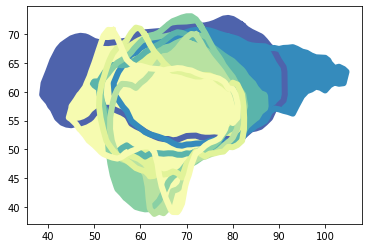

In [130]:
cmap2=py.get_cmap("Spectral_r")
event_1 = val_2007['start_block_date=2012-Jan-31']
MAX = len(event_1['contours'][0])
for i in range(MAX):
    p = shp.Polygon(event_1['contours'][0][i])
    py.plot(((*p.exterior.coords.xy)), lw=6, c=cmap2(((i+0.5)/2)/MAX))
    py.fill(((*p.exterior.coords.xy)), alpha=1, facecolor=cmap2(((i+0.5)/2)/MAX), edgecolor=None)
# py.plot(event_1['centroids'][1][0], event_1['centroids'][1][1], color='k')
# py.scatter(event_1['centroids'][1][0], event_1['centroids'][1][1], c=[cmap2(i) for i in range(MAX)], s=500)

print (MAX)

In [193]:
def plot_3d_schematic(event_1, elev=10., azim=-50, figsize=(15,8), cmap2=py.get_cmap("Spectral_r")):
    
        event_no=0
        def polygon_under_graph(p):
            """
            Construct the vertex list which defines the polygon filling the space under
            the (x, y) line graph. This assumes x is in ascending order.
            """
            return list(zip(*p.exterior.coords.xy))

        def extract_c(i, MAX):
            return cmap2(((i+0.5))/MAX)

        fig = py.figure(figsize=figsize, constrained_layout=True)
        ax = fig.add_subplot(projection='3d')

        verts = []
        
        MAXi = np.linspace(-int(len(event_1['contours'][event_no])/2), int(len(event_1['contours'][event_no])/2), len(event_1['contours'][event_no])) #len(event_1['contours'][1])
           
        MAX = len(MAXi)
        for i in range(MAX):
            p = shp.Polygon(event_1['contours'][event_no][i])
            ax.plot(((*p.exterior.coords.xy)), zs=MAXi[i], zdir='x', c=extract_c(i, MAX), lw=5)
            verts.append(polygon_under_graph(p))


        ydata = event_1['centroids'][event_no][0]
        zdata = event_1['centroids'][event_no][1]
        xdata = MAXi
        
        xc, yc = event_1['envelope_centroid'][event_no][0]

        facecolors=[extract_c(i, MAX) for i in range(MAX)]
        poly = PolyCollection(verts, facecolors=facecolors, alpha=0.3)
        ax.add_collection3d(poly, zs=xdata, zdir='x')

#         ax.scatter(xdata, ydata, zdata,  c=[extract_c(i, MAX) for i in range(MAX)], s=100)
        ax.scatter(xdata, ydata, zdata,  c='dodgerblue', s=100)
        ax.plot(xdata, ydata, zdata, c='gray' )
        

        lon_val = np.linspace(50, 110, 5)
        lon_labels = [(r'$%d^{\circ}$W'%(np.abs(i))) if i<0 else (r'$%d^{\circ}$E'%(i)) for i in lon_val]
        ax.set_yticks(lon_val)
        ax.set_yticklabels(lon_labels)
        
        t_val = MAXi
        t_labels = [('-%d'%(np.abs(i))) if i<0 else ('+%d'%(i)) for i in t_val]
        ax.set_xticks(t_val)
        ax.set_xticklabels(t_labels)
        
        
        lat_val = np.linspace(40, 80, 5)
        lat_labels = [(r'$%d^{\circ}$N'%(np.abs(i))) for i in lat_val]
        ax.set_zticks(lat_val)
        ax.set_zticklabels(lat_labels)
        
        ax.view_init(elev=elev, azim=azim)
#         ax.axis('off')
        ax.tick_params(labelsize=25, which='major', pad=10)
#         ax.grid(False)
    
        fc = 'white'
        ax.xaxis.pane.set_facecolor(fc)
        ax.yaxis.pane.set_facecolor(fc)
        ax.zaxis.pane.set_facecolor(fc)

        ax.set_xlabel('Time (Days)', labelpad=40, fontsize=25,)
        ax.set_ylabel('Longitude', labelpad=45, fontsize=25)
        ax.set_zlabel('Latitude', labelpad=28, fontsize=25)
        
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)

        return fig, ax, xc, yc


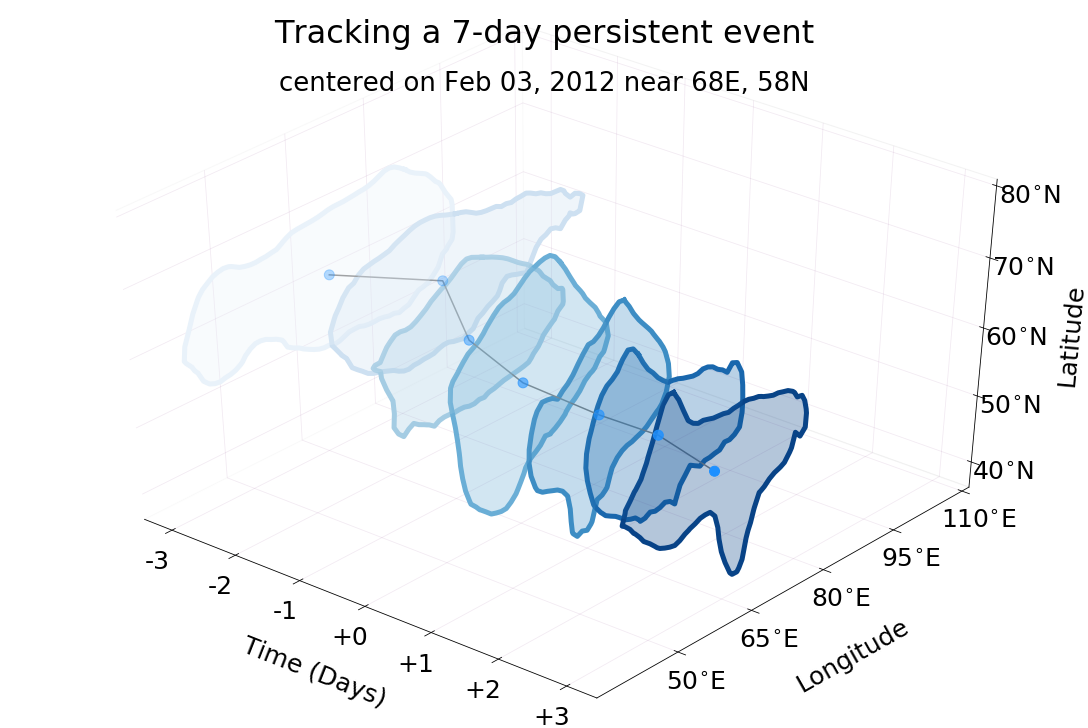

In [196]:
py.rcParams['figure.constrained_layout.use'] = True
py.rcParams['grid.color'] = (0.5, 0.2, 0.5, 0.1)
fig, ax, xc, yc = plot_3d_schematic(event_1 = val_2007['start_block_date=2012-Jan-31'], elev=40., azim=-50, figsize=(15,10), cmap2=py.get_cmap("Blues"))
fig.suptitle('Tracking a 7-day persistent event', fontsize=32, y=0.98)
ax.set_title('centered on Feb 03, 2012 near %dE, %dN'%(xc, yc), fontsize=26, y=0.95)

# dest = '/data/pragallva/2023_repeat_ERA5/2023_paper_figures/'
# os.makedirs(dest, exist_ok=True)
# fig.savefig(dest+'track_block_schematic-2012-Feb-03.png', dpi=300, bbox_inches='tight')
# fig.savefig(dest+'track_block_schematic-2012-Feb-03.pdf', bbox_inches='tight')


In [148]:
val_2007['start_block_date=2012-Jan-31']['peak_block_date']

['2012-Feb-3']